In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
data = gpd.read_file('../data/raw_data/raw_data.geojson')


In [13]:
data['OCEANS'].unique()

array(['Pacific Ocean', 'Atlantic Ocean', 'Arctic Ocean', None,
       'Indian Ocean'], dtype=object)

In [10]:
data['UNIT'].unique()

array(['pieces/m3', 'pieces/10 mins', 'pieces kg-1 d.w.'], dtype=object)

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data['Date']

0       2002-12-18
1       2006-10-17
2       2018-10-17
3       2015-01-03
4       2007-03-15
           ...    
19121   2015-02-01
19122   2001-03-14
19123   2008-05-01
19124   2021-10-28
19125   2021-03-11
Name: Date, Length: 19126, dtype: datetime64[ns]

In [20]:
data

,OBJECTID,OCEANS,REGIONS,SUBREGIONS,SAMPMETHOD,MEASUREMEN,UNIT,DENSRANGE,DENSTEXT,SHORTREF,...,DOI,ORG,KEYWORDS,ACCESSNO,ACCESSLINK,Latitude,Longitude,Date,GlobalID,geometry
0,6427,Pacific Ocean,None,None,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,2002-12-18,be27c450-02ca-4261-8d89-cae21108e6cc,POINT (-121.85 6.35)
1,10672,Pacific Ocean,None,None,Manta net,0.0130,pieces/m3,0.005-1,Medium,Goldstein et al.2013,...,https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,2006-10-17,23effcdd-35b7-4e1e-adb4-390693a287d3,POINT (-95.35 0.5)
2,13921,Atlantic Ocean,None,None,Aluminum bucket,1368.0000,pieces/m3,>=10,Very High,Queiroz et al.2022,...,https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,2018-10-17,16d77822-0533-4116-97b9-0bdb592f3d6e,POINT (-45.39816 0.63183)
3,9344,Pacific Ocean,None,None,Grab sample,0.0010,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,...,https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,2015-01-03,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,POINT (-99.6978 16.623)
4,5763,Atlantic Ocean,Caribbean Sea,None,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2010,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,19.770000,-81.060000,2007-03-15,3c57e795-589a-4836-8160-895d8ef960de,POINT (-81.06 19.77)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19121,9366,Atlantic Ocean,None,None,Grab sample,0.0110,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,17.100000,-47.550000,2015-02-01,fd4db6d6-aed7-48b1-a22b-402557112e2f,POINT (-47.55 17.1)
19122,4683,Atlantic Ocean,Caribbean Sea,None,Neuston net,0.0216,pieces/m3,0.005-1,Medium,Law et al.2010,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,21.390000,-81.960000,2001-03-14,83a8208e-2d06-4ad9-bcd9-81e29d57e0aa,POINT (-81.96 21.39)
19123,6043,Atlantic Ocean,None,None,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2010,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,24.140000,-81.980000,2008-05-01,0fd72d83-cd27-42e1-b63a-b015c23b28d2,POINT (-81.98 24.14)
19124,20169,Atlantic Ocean,None,None,Hand picking,NaN,pieces/10 mins,40-200,High,Tunnell et al. 2020,...,https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,39.924800,-75.127200,2021-10-28,fc84069e-c782-4c3d-bf6b-265535969d8e,POINT (-75.1272 39.9248)


In [21]:
df_avg = data.groupby('Date')['MEASUREMEN'].mean().reset_index()

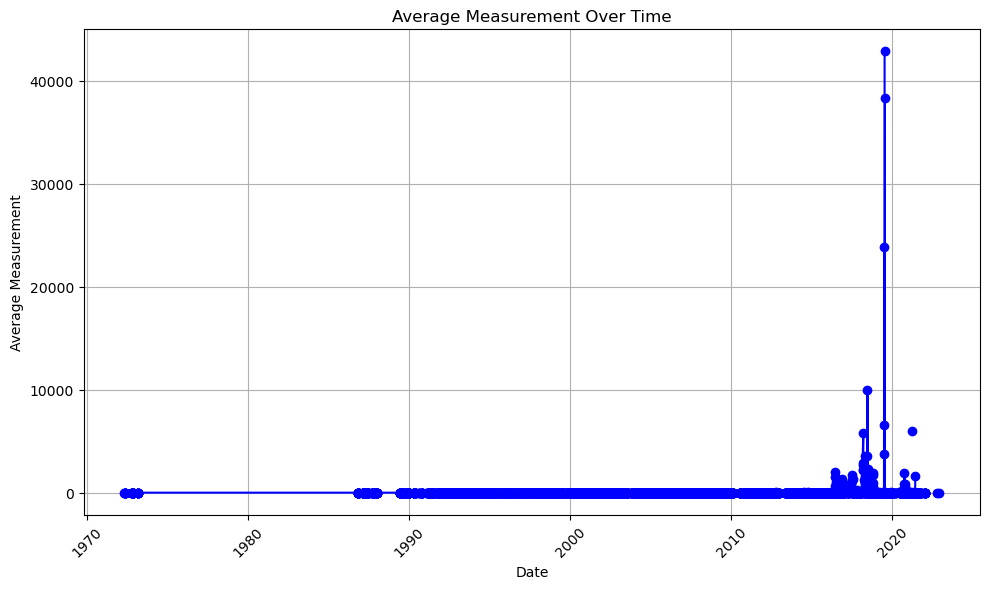

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df_avg['Date'], df_avg['MEASUREMEN'], marker='o', linestyle='-', color='b')
plt.title('Average Measurement Over Time')
plt.xlabel('Date')
plt.ylabel('Average Measurement')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()